# End-to-end Basic:

Import libraries

In [2]:
import pandas as pd
import numpy as np
import re 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler


Bad key text.latex.preview in file /Users/mehuljain/miniconda3/envs/aaamlp/lib/python3.10/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/mehuljain/miniconda3/envs/aaamlp/lib/python3.10/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/mehuljain/miniconda3/envs/aaamlp/lib/python3.10/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_qualit

## Load the data:

In [3]:
PATH= "../data/train_1.csv"

In [4]:
df= pd.read_csv(PATH)

In [5]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


What are the columns in the dataset?

In [7]:
df.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=551)

Other dataframes

In [8]:
PATH_2= "../data/key_1.csv"

In [9]:
key_df= pd.read_csv(PATH_2)

In [10]:
key_df.head()

,Page,Id
0,!vote_en.wikipedia.org_all-access_all-agents_2...,bf4edcf969af
1,!vote_en.wikipedia.org_all-access_all-agents_2...,929ed2bf52b9
2,!vote_en.wikipedia.org_all-access_all-agents_2...,ff29d0f51d5c
3,!vote_en.wikipedia.org_all-access_all-agents_2...,e98873359be6
4,!vote_en.wikipedia.org_all-access_all-agents_2...,fa012434263a


In [11]:
key_df.shape

(8703780, 2)

`key_df` contains the alpha-numeric ID for each Page and Date combination

In [12]:
# for example
key_df.iloc[1].Page

'!vote_en.wikipedia.org_all-access_all-agents_2017-01-02'

## Seperate pages and dates:

In [13]:
pgs= df["Page"]
dates=df.drop(columns='Page')

What do the dates looks like?

In [14]:
dates.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


Let's extract metadata from the page column in the dataframe. We can get the following information from the `Page` column:
- topic
- language
- access
- type


In [15]:
pgs.iloc[0]

'2NE1_zh.wikipedia.org_all-access_spider'

In [16]:
pgs= df['Page'].str.extract(r'(?P<topic>.*)\_(?P<lang>.*).wikipedia.org\_(?P<access>.*)\_(?P<type>.*)')
pgs.head()

,topic,lang,access,type
0,2NE1,zh,all-access,spider
1,2PM,zh,all-access,spider
2,3C,zh,all-access,spider
3,4minute,zh,all-access,spider
4,52_Hz_I_Love_You,zh,all-access,spider


In [17]:
pgs.shape

(145063, 4)

## Plot time series:

In [18]:
dates.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


Let's extract a row from the time series 

In [19]:
pg_one= dates.iloc[0,:]

In [20]:
pg_one=pg_one.reset_index()
pg_one=pg_one.rename(columns={'index':'date',0:'value'})
pg_one

,date,value
0,2015-07-01,18.0
1,2015-07-02,11.0
2,2015-07-03,5.0
3,2015-07-04,13.0
4,2015-07-05,14.0
...,...,...
545,2016-12-27,20.0
546,2016-12-28,22.0
547,2016-12-29,19.0
548,2016-12-30,18.0


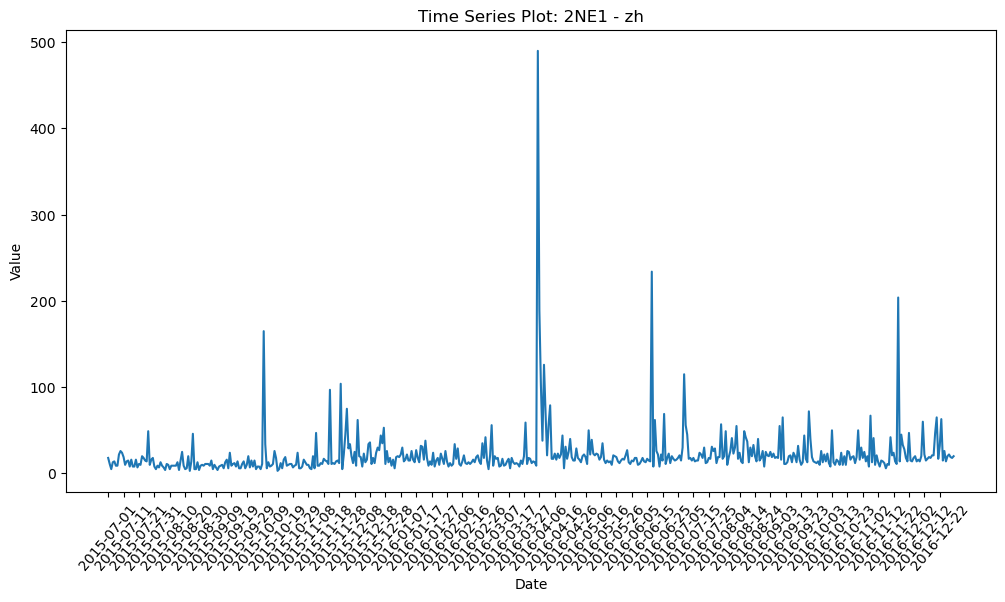

In [21]:
topic= pgs.iloc[0]['topic']
lang= pgs.iloc[0]['lang']
# Plotting the time series
plt.figure(figsize=(12, 6))
sns.lineplot(data=pg_one, x='date', y='value')
plt.xticks(pg_one['date'][::10], rotation=50)
plt.title(f'Time Series Plot: {topic} - {lang}')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

We can also look for a page related to a specific topic:

In [22]:
# search for the beatles
pg_nums= pgs[pgs['topic']=='The_Beatles'].index

In [23]:
# let's get all the beatles pages
beetles= dates.iloc[pg_nums]

In [24]:
beetles.iloc[0]

2015-07-01     676.0
2015-07-02     778.0
2015-07-03     584.0
2015-07-04     557.0
2015-07-05     609.0
               ...  
2016-12-27     889.0
2016-12-28     886.0
2016-12-29     758.0
2016-12-30     902.0
2016-12-31    1287.0
Name: 6013, Length: 550, dtype: float64

Plot the number of visits for all the `Beatles` pages.  

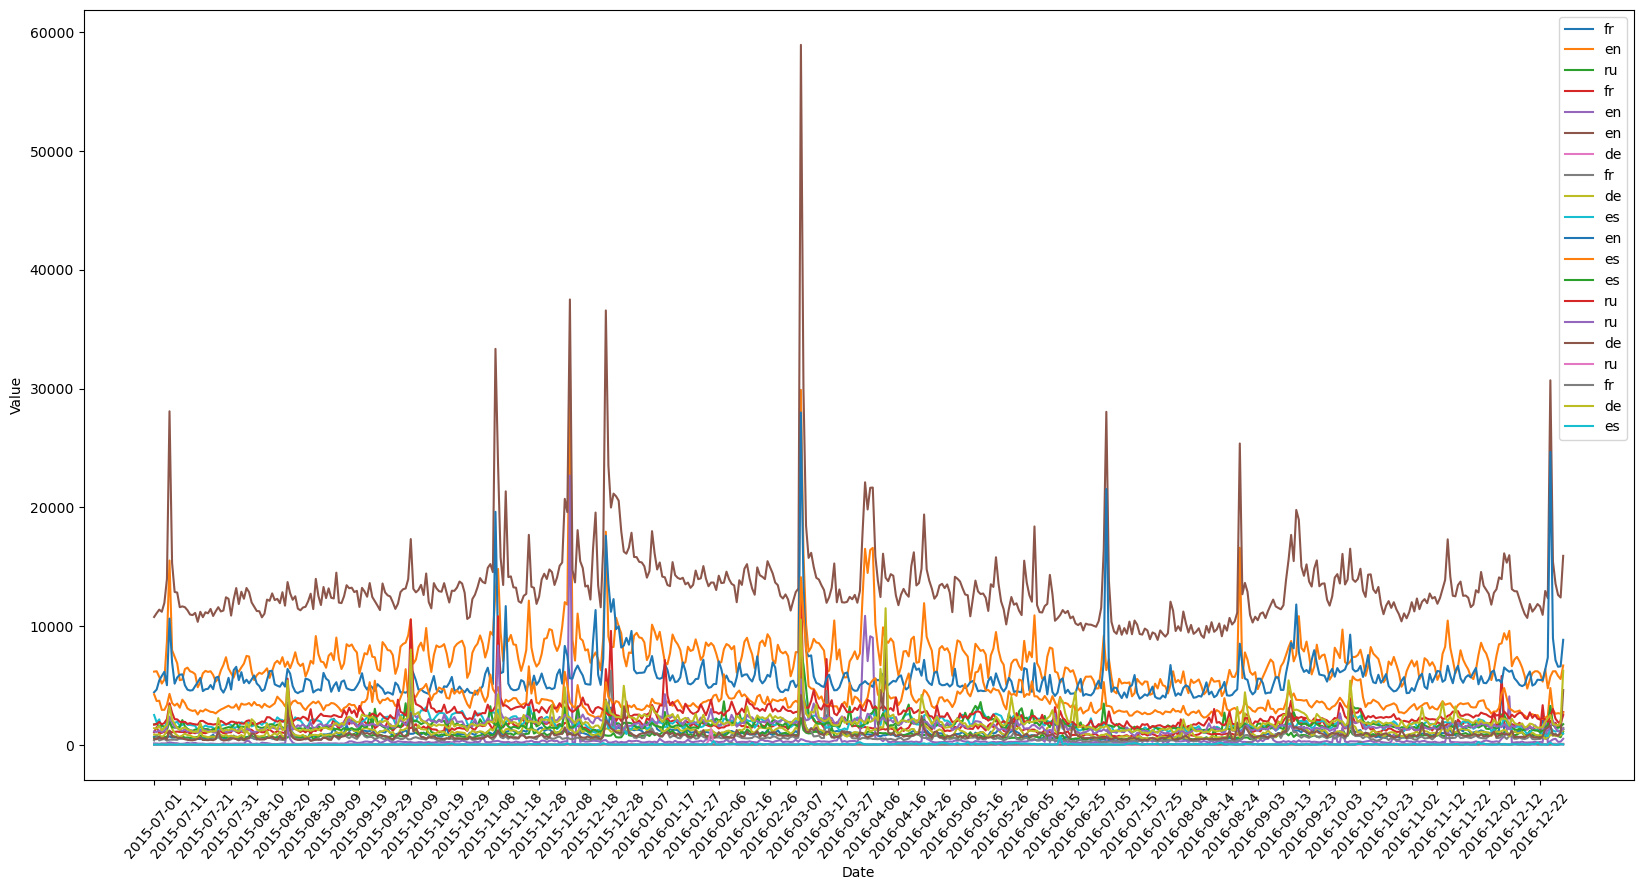

In [25]:
plt.figure(figsize=(20, 10))

for i in range(len(beetles)):
    ser= beetles.iloc[i]
    ser=ser.reset_index()
    ser=ser.rename(columns={'index':'date',pg_nums[i]:'value'})
    sns.lineplot(data=ser, x='date', y='value')
    
plt.legend(pgs[pgs['topic']=='The_Beatles'].lang.values)
plt.xticks(ser['date'][::10], rotation=50)
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


## Data Preprocessing:

Data preprocessing code if needed. 

## Baselines:

### Baseline 1:
Predict the same value as the previous year. 

This exercise is mainly helpful is setting up the prediction code.

In [26]:
dates.shape

(145063, 550)

In [27]:
dates.iloc[:,-60:]

,2016-11-02,2016-11-03,2016-11-04,2016-11-05,2016-11-06,2016-11-07,2016-11-08,2016-11-09,2016-11-10,2016-11-11,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,18.0,25.0,14.0,20.0,8.0,67.0,13.0,41.0,10.0,21.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,11.0,14.0,26.0,11.0,21.0,14.0,14.0,54.0,5.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3.0,3.0,3.0,2.0,10.0,2.0,2.0,2.0,7.0,3.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,12.0,11.0,15.0,7.0,12.0,13.0,9.0,8.0,21.0,16.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,5.0,6.0,33.0,13.0,10.0,22.0,11.0,8.0,4.0,10.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's format this output and convert into a dataframe that can be submitted as a valid submission on Kaggle. 

In [28]:
prev_60= list(dates.iloc[:,-60:].columns)
train_flat= pd.melt(df.loc[:,['Page']+prev_60], id_vars='Page', var_name='date')
train_flat['date'] = pd.to_datetime(train_flat['date'], format='%Y-%m-%d')

Some more formatting

In [29]:
key_df['date'] = key_df['Page'].apply(lambda x: x.split('_')[-1])
key_df['Page'] = key_df['Page'].apply(lambda x: '_'.join(x.split('_')[:-1]))
key_df['date'] = pd.to_datetime(key_df['date'], format='%Y-%m-%d')

In [30]:
sub = pd.read_csv('../data/sample_submission_1.csv.zip')

In [31]:
sub = sub.merge(key_df, on='Id', how='left')
sub.head()

,Id,Visits,Page,date
0,bf4edcf969af,0,!vote_en.wikipedia.org_all-access_all-agents,2017-01-01
1,929ed2bf52b9,0,!vote_en.wikipedia.org_all-access_all-agents,2017-01-02
2,ff29d0f51d5c,0,!vote_en.wikipedia.org_all-access_all-agents,2017-01-03
3,e98873359be6,0,!vote_en.wikipedia.org_all-access_all-agents,2017-01-04
4,fa012434263a,0,!vote_en.wikipedia.org_all-access_all-agents,2017-01-05


In [32]:
sub['date'].min(),sub['date'].max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2017-03-01 00:00:00'))

In [33]:
train_flat['prediction_date'] = train_flat['date'] + pd.DateOffset(days=60)
sub = sub[['Page', 'date', 'Id']].merge(train_flat[['Page', 'prediction_date', 'value']], left_on=('Page', 'date'), right_on=('Page', 'prediction_date'))
sub['value'] = sub['value'].fillna(0)

In [34]:
sub.shape

(8703780, 5)

Finally, what does the submission look like

In [35]:
sub.head()

,Page,date,Id,prediction_date,value
0,!vote_en.wikipedia.org_all-access_all-agents,2017-01-01,bf4edcf969af,2017-01-01,5.0
1,!vote_en.wikipedia.org_all-access_all-agents,2017-01-02,929ed2bf52b9,2017-01-02,4.0
2,!vote_en.wikipedia.org_all-access_all-agents,2017-01-03,ff29d0f51d5c,2017-01-03,4.0
3,!vote_en.wikipedia.org_all-access_all-agents,2017-01-04,e98873359be6,2017-01-04,8.0
4,!vote_en.wikipedia.org_all-access_all-agents,2017-01-05,fa012434263a,2017-01-05,5.0


### Baseline 2:
Predict the median value for the past 60 days.

In [36]:
median_60= dates.iloc[:,-60:].median(axis=1, skipna=True)
median_60= pd.DataFrame({'Page':df['Page'], 'visits':median_60})

In [37]:
sub = pd.read_csv('../data/sample_submission_1.csv.zip')
sub = sub.merge(key_df, on='Id', how='left')
sub.head()

,Id,Visits,Page,date
0,bf4edcf969af,0,!vote_en.wikipedia.org_all-access_all-agents,2017-01-01
1,929ed2bf52b9,0,!vote_en.wikipedia.org_all-access_all-agents,2017-01-02
2,ff29d0f51d5c,0,!vote_en.wikipedia.org_all-access_all-agents,2017-01-03
3,e98873359be6,0,!vote_en.wikipedia.org_all-access_all-agents,2017-01-04
4,fa012434263a,0,!vote_en.wikipedia.org_all-access_all-agents,2017-01-05


Let's merge the two dataframes

In [38]:
sub_median_60 = sub.merge(median_60, on='Page')[['Id', 'visits']]

In [39]:
sub_median_60

,Id,visits
0,bf4edcf969af,3.0
1,929ed2bf52b9,3.0
2,ff29d0f51d5c,3.0
3,e98873359be6,3.0
4,fa012434263a,3.0
...,...,...
8703775,f69747f5ee68,224.5
8703776,2489963dc503,224.5
8703777,b0624c909f4c,224.5
8703778,24a1dfb06c10,224.5


Filling the non-zero values 

In [40]:
sub_median_60['visits'] = sub_median_60['visits'].fillna(0)


### Baseline 3:
Let's train a ARIMA model on the data in this part. 

In [41]:
dates

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# SMAPE Metric
def smape(actual, forecast):
    result = 1/len(actual) * np.sum(2*np.abs(forecast-actual) / (np.abs(actual) + np.abs(forecast))*100)
    return result

Select a row of data

In [43]:
row = dates.iloc[0, :]

Split into training and test set (last 30 days of the training data)

In [44]:
train_date= row[:-31]
test_date= row[-31:]

In [46]:
row

2015-07-01    18.0
2015-07-02    11.0
2015-07-03     5.0
2015-07-04    13.0
2015-07-05    14.0
              ... 
2016-12-27    20.0
2016-12-28    22.0
2016-12-29    19.0
2016-12-30    18.0
2016-12-31    20.0
Name: 0, Length: 550, dtype: float64

In [45]:
row.values.reshape(-1, 1)

array([[ 18.],
       [ 11.],
       [  5.],
       [ 13.],
       [ 14.],
       [  9.],
       [  9.],
       [ 22.],
       [ 26.],
       [ 24.],
       [ 19.],
       [ 10.],
       [ 14.],
       [ 15.],
       [  8.],
       [ 16.],
       [  8.],
       [  8.],
       [ 16.],
       [  7.],
       [ 11.],
       [ 10.],
       [ 20.],
       [ 18.],
       [ 15.],
       [ 14.],
       [ 49.],
       [ 10.],
       [ 16.],
       [ 18.],
       [  8.],
       [  5.],
       [  9.],
       [  7.],
       [ 13.],
       [  9.],
       [  7.],
       [  4.],
       [ 11.],
       [ 10.],
       [  5.],
       [  9.],
       [  9.],
       [  9.],
       [  9.],
       [ 13.],
       [  4.],
       [ 15.],
       [ 25.],
       [  9.],
       [  5.],
       [  6.],
       [ 20.],
       [  3.],
       [ 14.],
       [ 46.],
       [  5.],
       [  5.],
       [ 13.],
       [  4.],
       [  9.],
       [ 10.],
       [  9.],
       [ 11.],
       [ 11.],
       [ 11.],
       [  

In [ ]:
data = data.astype('float')
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

#### ARIMA model function:

Create a function to fit the `ARIMA` model. 

In [55]:
def Arima(data, p, d, q, test_days, visualize_predictions=False):

    train_date = data[:-31]
    test_date = data[-31:]

    data = data.astype('float')
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

    #scaled_data.index = pd.to_datetime(data.index)
    train = scaled_data[:-31]
    test = scaled_data[-31:]

    #print(train), print(type(train)), print(train.shape), print(len(train))
    train = pd.Series(train.reshape(len(train)), index=pd.to_datetime(train_date.index))
    test = pd.Series(test.reshape(len(test)), index=pd.to_datetime(test_date.index))

    arima = ARIMA(train, order=[p, d, q])
    model = arima.fit()

    # Predict
    ## Training predictions
    train_start = 0
    train_end = len(train)
    train_pred = model.predict(start=train_start, end=train_end, typ='levels')

    ## Testing predictions
    test_start = len(train)
    test_end = len(train) + len(test) - 1
    test_pred = model.predict(start=test_start, end=test_end, typ='levels')

    # Inverse transform
    train_inverse = scaler.inverse_transform(np.array(train_pred).reshape(-1, 1))
    test_inverse = scaler.inverse_transform(np.array(test_pred).reshape(-1, 1))

    #print(test_pred)
    
    train_error = smape(train, train_pred)
    test_error = smape(test, test_pred)
    
    print(f'Train Error: {train_error} | Test Error: {test_error}')
    
    return model, train_inverse, test_inverse

In [56]:
row = dates.iloc[0, :]

In [57]:
model, train_pred, test_pred = Arima(row, 5, 1, 5, 31)

/Users/mehuljain/miniconda3/envs/aaamlp/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/mehuljain/miniconda3/envs/aaamlp/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/mehuljain/miniconda3/envs/aaamlp/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Train Error: 56.55928039466996 | Test Error: 44.61767233879621


/Users/mehuljain/miniconda3/envs/aaamlp/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/mehuljain/miniconda3/envs/aaamlp/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
